In [50]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from MotionBERT.common_import import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
fig_num = 1
data_type_list = ['source_list', 'cam_param',
                  'cam_3d', 'img_2d',
                  'cam_3d_canonical_revolute', 'img_2d_canonical_revolute',
                  ]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M cam_3d_canonical_revolute...
[overwrite: False] ==> Loading H36M img_2d_canonical_revolute...


In [53]:
source = 'S1_55011271_Walking'
subject, cam_id, action = split_source_name(source, dataset_name)
print(subject, cam_id, action)
cam_3d = data['cam_3d'][subject][action][cam_id].copy()
img_2d = data['img_2d'][subject][action][cam_id].copy()
cam_3d_hat = cam_3d.copy() - cam_3d[:, 0:1]
cam_3d_canonical = data['cam_3d_canonical_revolute'][subject][action][cam_id].copy()
img_2d_canonical = data['img_2d_canonical_revolute'][subject][action][cam_id].copy()
cam_param = data['cam_param'][subject][action][cam_id].copy()
W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
img_2d_norm = normalize_input(img_2d, W, H)
img_2d_centered = img_2d_norm.copy() - img_2d_norm[:, 0:1]
img_2d_canonical_norm = normalize_input(img_2d_canonical, W, H)

S1 55011271 Walking


### (a) global position vs local pose domain gap

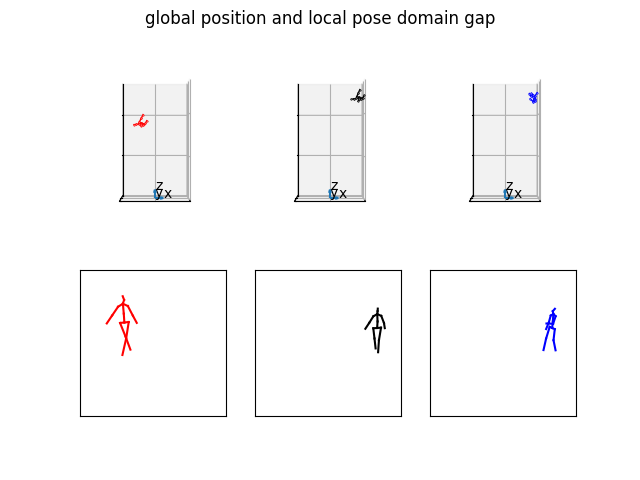

/home/lhs/codes/MotionBERT/custom_codes/figures/revolute/fig1/fig1_a.svg


In [48]:
sub_num = 'a'
frame_num = 200

cam_pose1 = cam_3d.copy()
img_pose1 = projection(cam_pose1, intrinsic)
img_pose1_norm = normalize_input(img_pose1, W, H)

cam_pose2 = cam_3d.copy() + np.array([-2.5, 0, -1.5]) #- cam_3d[:, 0:1] + np.array([-1, 0, 5])
img_pose2 = projection(cam_pose2, intrinsic)
img_pose2_norm = normalize_input(img_pose2, W, H)

cam_pose3 = cam_3d.copy()
cam_pose3[frame_num] = cam_pose1[frame_num + 100].copy() - cam_pose1[frame_num + 100, 0:1] + cam_pose1[frame_num, 0:1]
img_pose3 = projection(cam_pose3, intrinsic)
img_pose3_norm = normalize_input(img_pose3, W, H)

configs = {
    'ax_3d_top_pose1': {'type': '3d', 'loc': 231, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_3d_top_pose2': {'type': '3d', 'loc': 232, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_3d_top_pose3': {'type': '3d', 'loc': 233, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_2d_pose1': {'type': '2d', 'loc': 234, 'normalize': True},
    'ax_2d_pose2': {'type': '2d', 'loc': 235, 'normalize': True},
    'ax_2d_pose3': {'type': '2d', 'loc': 236, 'normalize': True},
}
fig, axs = generate_axes('a', configs, fig_title='')
plot_pose_setting = [
    ('ax_3d_top_pose1', cam_pose2, {'color': 'r', 'label': '3d'}),
    ('ax_3d_top_pose2', cam_pose1, {'color': 'k', 'label': '3d'}),
    ('ax_3d_top_pose3', cam_pose3, {'color': 'b', 'label': '3d'}),
    ('ax_2d_pose1', img_pose2_norm, {'color': 'r', 'label': f'pelvis at ({cam_pose1[frame_num][0][0]:.1f}, {cam_pose1[frame_num][0][1]:.1f}, {cam_pose1[frame_num][0][2]:.1f})'}),
    ('ax_2d_pose2', img_pose1_norm, {'color': 'k', 'label': f'pelvis at ({cam_pose2[frame_num][0][0]:.1f}, {cam_pose2[frame_num][0][1]:.1f}, {cam_pose2[frame_num][0][2]:.1f})'}),
    ('ax_2d_pose3', img_pose3_norm, {'color': 'b', 'label': f'pelvis at ({cam_pose3[frame_num][0][0]:.1f}, {cam_pose3[frame_num][0][1]:.1f}, {cam_pose3[frame_num][0][2]:.1f})'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10, legend_loc='upper left', legend_bbox_to_anchor=(0, 0))

axs['ax_3d_top_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.set_xlabel('')
axs['ax_3d_top_pose1'].axes.set_ylabel('')
axs['ax_3d_top_pose1'].axes.set_zlabel('')
axs['ax_3d_top_pose1'].legend().remove()
axs['ax_3d_top_pose1'].set_title('')

axs['ax_3d_top_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.set_xlabel('')
axs['ax_3d_top_pose2'].axes.set_ylabel('')
axs['ax_3d_top_pose2'].axes.set_zlabel('')
axs['ax_3d_top_pose2'].legend().remove()
axs['ax_3d_top_pose2'].set_title('')

axs['ax_3d_top_pose3'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose3'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose3'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose3'].axes.set_xlabel('')
axs['ax_3d_top_pose3'].axes.set_ylabel('')
axs['ax_3d_top_pose3'].axes.set_zlabel('')
axs['ax_3d_top_pose3'].legend().remove()
axs['ax_3d_top_pose3'].set_title('')

axs['ax_2d_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.xaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_xlabel('')
axs['ax_2d_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.yaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_ylabel('')
axs['ax_2d_pose1'].legend().remove()
axs['ax_2d_pose1'].set_title('')

axs['ax_2d_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.xaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_xlabel('')
axs['ax_2d_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.yaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_ylabel('')
axs['ax_2d_pose2'].legend().remove()
axs['ax_2d_pose2'].set_title('')

axs['ax_2d_pose3'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose3'].axes.xaxis.set_ticks([])
axs['ax_2d_pose3'].axes.set_xlabel('')
axs['ax_2d_pose3'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose3'].axes.yaxis.set_ticks([])
axs['ax_2d_pose3'].axes.set_ylabel('')
axs['ax_2d_pose3'].legend().remove()
axs['ax_2d_pose3'].set_title('')

camera = Camera(origin=np.array([0, 0, 0]),
                calib_mat=intrinsic,
                cam_default_R=np.eye(3),
                IMAGE_HEIGHT=H,
                IMAGE_WIDTH=W,
                cam_name='cam_frame')
plt.sca(axs['ax_3d_top_pose1'])
camera.cam_frame.draw3d(show_name=False)
plt.sca(axs['ax_3d_top_pose2'])
camera.cam_frame.draw3d(show_name=False)
plt.sca(axs['ax_3d_top_pose3'])
camera.cam_frame.draw3d(show_name=False)

plt.suptitle('global position and local pose domain gap')
plt.show()
save_folder = f'custom_codes/figures/revolute/fig{fig_num}'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = os.path.join(save_folder, f'fig{fig_num}_{sub_num}.svg')
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
print(os.path.abspath(save_path))

### (b) canoncal version

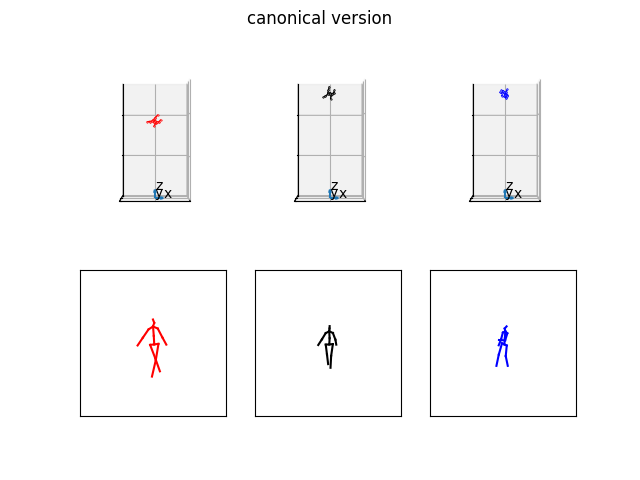

/home/lhs/codes/MotionBERT/custom_codes/figures/revolute/fig1/fig1_b.svg


In [49]:
sub_num = 'b'
frame_num = 200

cam_pose1 = cam_3d.copy()
cam_canonical_pose1 = canonicalization_cam_3d(cam_pose1, 'revolute')
img_canonical_pose1 = projection(cam_canonical_pose1, intrinsic)
img_canonical_pose1_norm = normalize_input(img_canonical_pose1, W, H)

cam_pose2 = cam_3d.copy() + np.array([-2.5, 0, -1.5]) #- cam_3d[:, 0:1] + np.array([-1, 0, 5])
cam_canonical_pose2 = canonicalization_cam_3d(cam_pose2, 'revolute')
img_canonical_pose2 = projection(cam_canonical_pose2, intrinsic)
img_canonical_pose2_norm = normalize_input(img_canonical_pose2, W, H)

cam_pose3 = cam_3d.copy()
cam_pose3[frame_num] = cam_pose1[frame_num + 100].copy() - cam_pose1[frame_num + 100, 0:1] + cam_pose1[frame_num, 0:1]
cam_canonical_pose3 = canonicalization_cam_3d(cam_pose3, 'revolute')
img_canonical_pose3 = projection(cam_canonical_pose3, intrinsic)
img_canonical_pose3_norm = normalize_input(img_canonical_pose3, W, H)

configs = {
    'ax_3d_top_pose1': {'type': '3d', 'loc': 231, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_3d_top_pose2': {'type': '3d', 'loc': 232, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_3d_top_pose3': {'type': '3d', 'loc': 233, 'mode': 'cam_top', 'zlim': [0, cam_3d[frame_num][0][2]+1]},
    'ax_2d_pose1': {'type': '2d', 'loc': 234, 'normalize': True},
    'ax_2d_pose2': {'type': '2d', 'loc': 235, 'normalize': True},
    'ax_2d_pose3': {'type': '2d', 'loc': 236, 'normalize': True},
}
fig, axs = generate_axes('b', configs, fig_title='')
plot_pose_setting = [
    ('ax_3d_top_pose1', cam_canonical_pose2, {'color': 'r', 'label': '3d'}),
    ('ax_3d_top_pose2', cam_canonical_pose1, {'color': 'k', 'label': '3d'}),
    ('ax_3d_top_pose3', cam_canonical_pose3, {'color': 'b', 'label': '3d'}),
    ('ax_2d_pose1', img_canonical_pose2_norm, {'color': 'r', 'label': f'pelvis at ({cam_pose1[frame_num][0][0]:.1f}, {cam_pose1[frame_num][0][1]:.1f}, {cam_pose1[frame_num][0][2]:.1f})'}),
    ('ax_2d_pose2', img_canonical_pose1_norm, {'color': 'k', 'label': f'pelvis at ({cam_pose2[frame_num][0][0]:.1f}, {cam_pose2[frame_num][0][1]:.1f}, {cam_pose2[frame_num][0][2]:.1f})'}),
    ('ax_2d_pose3', img_canonical_pose3_norm, {'color': 'b', 'label': f'pelvis at ({cam_pose3[frame_num][0][0]:.1f}, {cam_pose3[frame_num][0][1]:.1f}, {cam_pose3[frame_num][0][2]:.1f})'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num, legend_fontsize=10, legend_loc='upper left', legend_bbox_to_anchor=(0, 0))

axs['ax_3d_top_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose1'].axes.set_xlabel('')
axs['ax_3d_top_pose1'].axes.set_ylabel('')
axs['ax_3d_top_pose1'].axes.set_zlabel('')
axs['ax_3d_top_pose1'].legend().remove()
axs['ax_3d_top_pose1'].set_title('')

axs['ax_3d_top_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose2'].axes.set_xlabel('')
axs['ax_3d_top_pose2'].axes.set_ylabel('')
axs['ax_3d_top_pose2'].axes.set_zlabel('')
axs['ax_3d_top_pose2'].legend().remove()
axs['ax_3d_top_pose2'].set_title('')

axs['ax_3d_top_pose3'].axes.xaxis.set_ticklabels([])
axs['ax_3d_top_pose3'].axes.yaxis.set_ticklabels([])
axs['ax_3d_top_pose3'].axes.zaxis.set_ticklabels([])
axs['ax_3d_top_pose3'].axes.set_xlabel('')
axs['ax_3d_top_pose3'].axes.set_ylabel('')
axs['ax_3d_top_pose3'].axes.set_zlabel('')
axs['ax_3d_top_pose3'].legend().remove()
axs['ax_3d_top_pose3'].set_title('')

axs['ax_2d_pose1'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.xaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_xlabel('')
axs['ax_2d_pose1'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose1'].axes.yaxis.set_ticks([])
axs['ax_2d_pose1'].axes.set_ylabel('')
axs['ax_2d_pose1'].legend().remove()
axs['ax_2d_pose1'].set_title('')

axs['ax_2d_pose2'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.xaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_xlabel('')
axs['ax_2d_pose2'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose2'].axes.yaxis.set_ticks([])
axs['ax_2d_pose2'].axes.set_ylabel('')
axs['ax_2d_pose2'].legend().remove()
axs['ax_2d_pose2'].set_title('')

axs['ax_2d_pose3'].axes.xaxis.set_ticklabels([])
axs['ax_2d_pose3'].axes.xaxis.set_ticks([])
axs['ax_2d_pose3'].axes.set_xlabel('')
axs['ax_2d_pose3'].axes.yaxis.set_ticklabels([])
axs['ax_2d_pose3'].axes.yaxis.set_ticks([])
axs['ax_2d_pose3'].axes.set_ylabel('')
axs['ax_2d_pose3'].legend().remove()
axs['ax_2d_pose3'].set_title('')

camera = Camera(origin=np.array([0, 0, 0]),
                calib_mat=intrinsic,
                cam_default_R=np.eye(3),
                IMAGE_HEIGHT=H,
                IMAGE_WIDTH=W,
                cam_name='cam_frame')
plt.sca(axs['ax_3d_top_pose1'])
camera.cam_frame.draw3d(show_name=False)
plt.sca(axs['ax_3d_top_pose2'])
camera.cam_frame.draw3d(show_name=False)
plt.sca(axs['ax_3d_top_pose3'])
camera.cam_frame.draw3d(show_name=False)

plt.suptitle('canonical version')
plt.show()
save_folder = f'custom_codes/figures/revolute/fig{fig_num}'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = os.path.join(save_folder, f'fig{fig_num}_{sub_num}.svg')
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
print(os.path.abspath(save_path))